## Question 4 - BAIT 509 Kinjal Majumdar

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

### Split the data into random training and validation sets. Set aside 40% of the data for the validation set. OR, skip this step if you plan on doing cross validation

In [54]:
mydata = pd.read_csv("https://raw.githubusercontent.com/vincenzocoia/BAIT509/master/assessments/assignment3/data/auto_data.csv")
y = mydata["mileage"]
X = mydata[["cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]]

In [55]:
mydata

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mileage
0,18.0,8,307.0,130,3504.0,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693.0,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436.0,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433.0,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449.0,10.5,70,1,ford torino,0
5,15.0,8,429.0,198,4341.0,10.0,70,1,ford galaxie 500,0
6,14.0,8,454.0,220,4354.0,9.0,70,1,chevrolet impala,0
7,14.0,8,440.0,215,4312.0,8.5,70,1,plymouth fury iii,0
8,14.0,8,455.0,225,4425.0,10.0,70,1,pontiac catalina,0
9,15.0,8,390.0,190,3850.0,8.5,70,1,amc ambassador dpl,0


In [56]:
X.shape

(392, 7)

### Fit the two models over a grid of hyperparameters, and report the generalization error in all cases. You can report them in a table, or a plot. To make things easy, you don’t have to choose a fine grid, as long as the optimal hyperparameters are located somewhere in the range of the grid. For both methods, what hyperparameter(s) on your grid has the best generalization error? Of these two models, which one is better, the linear or radial?

### Fitting an SVM model

1. Scale the data
(this page on sklearn's documentation is useful).
Initiate transformer with StandardScaler() from sklearn.preprocessing.
Fit the transformer using the .fit() method.
Use the scaler to transform X, with the .transform() method.

In [57]:
scaler = StandardScaler()
scaler.fit(X)
Xscale = scaler.transform(X)

Initiate the model fit as usual; ignore specification of C.

In [58]:
model_linear = svm.SVC(kernel="linear")
model_radial = svm.SVC(kernel="rbf")

In [59]:
errors_linear = []
errors_radial = []

Define a grid of C (hyperparameter/tuning parameter) values:

In [60]:
C_linear = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

From the initiated model, initiate cross validation using the GridSearchCV() function, like so:

In [61]:
linear_cv = GridSearchCV(model_linear, param_grid={"C":C_linear}, cv=10)

Now, "fit" the cross validation with the .fit() method (as if you're fitting a model). Warning: this will be slow if you did not scale the data!

In [62]:
linear_cv.fit(Xscale, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

We can obtain the best parameters and best scores by appending .best_params_ and .best_score_:

In [63]:
linear_cv.best_params_

{'C': 2}

In [64]:
linear_cv.best_score_

0.9030612244897959

 We obtain info about all folds by appending .cv_results_. 

In [65]:
linear_cv.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.00919547, 0.00779619, 0.0087944 , 0.01069148, 0.00969436,
        0.01938641, 0.03258154, 0.05546889, 0.01089413, 0.01248777]),
 'std_fit_time': array([0.00331204, 0.0008686 , 0.00132494, 0.00360139, 0.00109873,
        0.01284647, 0.02510228, 0.01755249, 0.00211635, 0.00287488]),
 'mean_score_time': array([0.00129874, 0.00129883, 0.00139937, 0.0011982 , 0.00149972,
        0.00220025, 0.00269935, 0.00369811, 0.00080028, 0.00109897]),
 'std_score_time': array([0.00045876, 0.00045867, 0.00048917, 0.00059791, 0.00067001,
        0.00116486, 0.00179013, 0.00214608, 0.00060035, 0.0002999 ]),
 'param_C': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1},
  {'C': 2},
  {'C': 3},
  {'C': 4},
  {'C': 5},
  {'C': 6},
  {'C': 7},
  {'C': 8},
  {'C': 9},
  {'C': 10}],
 'split0_test_score'

In [66]:
for rad in linear_cv.grid_scores_:
    errors_linear.append(1-rad[1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [67]:
C_linear_additional = [1.25, 1.5, 1.75, 2]

In [68]:
C_linear.extend(C_linear_additional)
linear_cv = GridSearchCV(model_linear, param_grid={"C":C_linear_additional}, cv=10)
linear_cv.fit(Xscale, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1.25, 1.5, 1.75, 2]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [69]:
print('Optimal C value:', linear_cv.best_params_)

Optimal C value: {'C': 2}


In [70]:
print('Accuracy Corresponding to optimal C value', linear_cv.best_score_)

Accuracy Corresponding to optimal C value 0.9030612244897959


In [71]:
for rad in linear_cv.grid_scores_:
    errors_linear.append(1-rad[1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


for rad in linear_cv.grid_scores_:
    errors_linear.append(1-rad[1])

In [72]:
C_radial = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [73]:
radial_cv = GridSearchCV(model_radial, param_grid={"C":C_radial}, cv=10)
radial_cv.fit(Xscale, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [74]:
radial_cv.best_params_

{'C': 10}

In [75]:
for rad in radial_cv.grid_scores_:
    errors_radial.append(1-rad[1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


for rad in radial_cv.grid_scores_:
    errors_radial.append(1-rad[1])

In [76]:
C_radial_ext = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [77]:
C_radial.extend(C_radial_ext)
radial_cv = GridSearchCV(model_radial, param_grid={"C":C_radial_ext}, cv=10)
radial_cv.fit(Xscale, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [78]:
print('Optimal score for C:', radial_cv.best_params_)


Optimal score for C: {'C': 12}


In [79]:
print('Accuracy for optimal C score:', radial_cv.best_score_)

Accuracy for optimal C score: 0.9081632653061225


In [80]:
for rad in radial_cv.grid_scores_:
    errors_radial.append(1-rad[1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


for rad in radial_cv.grid_scores_:
    errors_radial.append(1-rad[1])

##  Linear Model

In [85]:
linear_score = pd.DataFrame(
    {'C value': C_linear,
     'Error': errors_linear
    })
linear_score = linear_score.drop([13])

In [86]:
print(linear_score)

    C value     Error
0      1.00  0.102041
1      2.00  0.096939
2      3.00  0.096939
3      4.00  0.096939
4      5.00  0.096939
5      6.00  0.096939
6      7.00  0.096939
7      8.00  0.096939
8      9.00  0.096939
9     10.00  0.096939
10     1.25  0.099490
11     1.50  0.099490
12     1.75  0.099490


## Radial Model

In [88]:
radial_score = pd.DataFrame(
    {'C value': C_radial,
     'Error': errors_radial
    })
radial_score = radial_score.drop([9])

In [89]:
print(radial_score)

    C value     Error
0         1  0.102041
1         2  0.109694
2         3  0.102041
3         4  0.102041
4         5  0.099490
5         6  0.099490
6         7  0.099490
7         8  0.096939
8         9  0.096939
10       10  0.094388
11       11  0.094388
12       12  0.091837
13       13  0.091837
14       14  0.091837
15       15  0.094388
16       16  0.099490
17       17  0.096939
18       18  0.094388
19       19  0.096939
20       20  0.096939


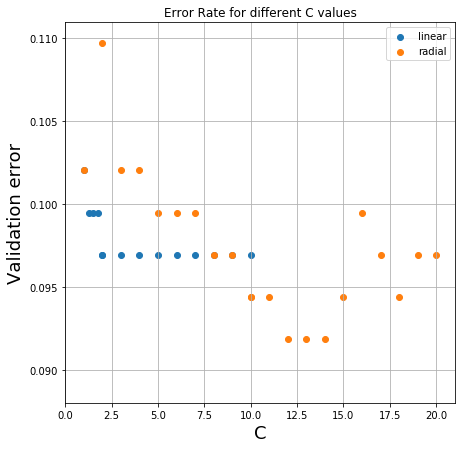

In [95]:
plt.figure(figsize=(7, 7))
plt.scatter(C_linear, errors_linear)
plt.scatter(C_radial, errors_radial)
plt.xlabel('C', fontsize=18)
plt.ylabel('Validation error', fontsize=18)
plt.title("Error Rate for different C values")
plt.grid()
plt.legend(['linear', 'radial'], loc='upper right', prop={'size': 10})
plt.show()

We can see from the graph above that the minimal error rate amongst the models utilized is the radial model's 9.2% for the C values of 12,13 and 14. This can be noted from the cross validation error shown. Given the minimal error I would therefore choose the radial SVM model.